# Determinacion de puntos para toma de muestras

In [1431]:
# python 3.7
#
# Parametros de entrada:
#    nombre del archivo formato csv
#    numero minimo de puntos a seleccionar o ... porcentaje minimo de puntos a seleccionar
#    distancia minima entre puntos <--- en mts
#

In [1432]:
import random
import math

In [1433]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [1434]:
import pandas as pd

In [1435]:
# Print helpful messages
# set to False in Production
debug = False

In [1436]:
# Lee el csv
filename = '/Users/Julio/Dropbox7current/ATY/data/Puntos_Point.csv'
filename = '../data/Puntos_Point.csv'

name = 'A3-c'
#name = 'A4-b'

df = pd.read_csv(filename)
df = df[(df['Name'] == name )]

total_points =  len(df)

# Prop. of total point number
prop = 0.3
# Minimal Distance Allowed
min_distance_allowed = 141
print('Total Points in csv:',total_points)
print('% of Points to use:',prop*100, '| Number of points to use:',int(prop*len(df)) )
print('Min. distance allowed:',min_distance_allowed)

Total Points in csv: 179
% of Points to use: 30.0 | Number of points to use: 53
Min. distance allowed: 141


In [1437]:
df.head(3)

,wkt_geom,left,top,right,bottom,id,Area,Region,Region_Let,Number,Client_Nam,Columna1,Name,Crop,AUTO
0,Point (11700934.77801547385752201 1484840.3588...,11700884.78,1484890.359,11700984.78,1484790.359,530,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0
1,Point (11700934.77801547385752201 1484740.3588...,11700884.78,1484790.359,11700984.78,1484690.359,531,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0
2,Point (11700934.77801547385752201 1484940.3588...,11700884.78,1484990.359,11700984.78,1484890.359,529,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0


In [1438]:
# Transform wkt_geom to X, Y coord.
def regulariza(t):
    nc  = t.replace('(','')
    nc2 = nc.replace(')','')
    return nc2 

df[['sinuso','X','Y']] = df['wkt_geom'].str.split(" ",expand=True, )
df.drop(columns=['sinuso'],inplace=True)
df['X']=df['X'].apply(regulariza)
df['Y']=df['Y'].apply(regulariza)
df.head(3)

,wkt_geom,left,top,right,bottom,id,Area,Region,Region_Let,Number,Client_Nam,Columna1,Name,Crop,AUTO,X,Y
0,Point (11700934.77801547385752201 1484840.3588...,11700884.78,1484890.359,11700984.78,1484790.359,530,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0,11700934.77801547385752201,1484840.35880533838644624
1,Point (11700934.77801547385752201 1484740.3588...,11700884.78,1484790.359,11700984.78,1484690.359,531,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0,11700934.77801547385752201,1484740.35880533838644624
2,Point (11700934.77801547385752201 1484940.3588...,11700884.78,1484990.359,11700984.78,1484890.359,529,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0,11700934.77801547385752201,1484940.35880533838644624


In [1439]:
# To numeric
df['X'] = pd.to_numeric(df['X'], errors='raise', downcast='float')
df['Y'] = pd.to_numeric(df['Y'], errors='raise', downcast='float')

In [1440]:
X = df['X'].values
Y = df['Y'].values
#df.info()

# Minimos
xmin = int(df['X'].min())
ymin = int(df['Y'].min())

# Maximos
xmax = int(df['X'].max())
ymax = int(df['Y'].max())

print('Min. coord.:',df['X'].min(), df['Y'].min(),' | Integer:',xmin,ymin)
print('Max. coord.:',df['X'].max(), df['Y'].max(),' | Integer:',xmax,ymax)

Min. coord.: 11699435.0 1483940.4  | Integer: 11699435 1483940
Max. coord.: 11700935.0 1485740.4  | Integer: 11700935 1485740


### Puntos recibidos

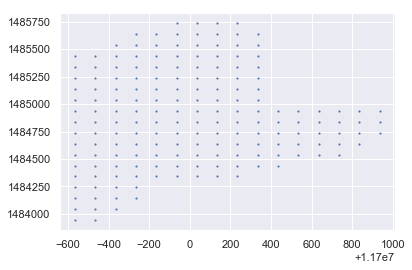

In [1441]:
plt.scatter(X,Y, marker='.', s = 5);

In [1442]:
# universe_points se obtiene del archivo csv
universe_points = []
for i in range(0,len(X)):
    x = X[i] #- xmin
    y = Y[i] #- ymin
    universe_points.append([x,y])

In [1443]:
universe_points[0:4]

[[11700935.0, 1484840.4],
 [11700935.0, 1484740.4],
 [11700935.0, 1484940.4],
 [11700835.0, 1484640.4]]

In [1444]:
min_necesary_points = int(prop*len(universe_points))
print('Min. number of Points needed:',min_necesary_points)

Min. number of Points needed: 53


In [1445]:
#universe_points
# Crea un arreglo de points_number puntos  
# Esto debe ser obtenido desde el archivo csv
#total_points_number = 100
#for x in range(total_points_number):
#  universe_points.append( [random.randint(1,100),random.randint(1,100)] ) 

In [1446]:
def distance(p,q):
    '''
    Euclidian distance
    '''
    return math.sqrt( (p[0]-q[0])*(p[0]-q[0]) + (p[1]-q[1])*(p[1]-q[1]) )  

In [1447]:
def get_point():
    '''
    Get a new point from the points array
    '''
    i = random.randint(0, total_points-1)
    return universe_points[i]

In [1448]:
def get_first_point():
    '''
    Get the first point from the points array
    The nearest point to the centroid of all points
    '''
    xmin = 9999999999999999
    xmax = -999999999999999
    ymin = 9999999999999999
    ymax = -999999999999999
    first_point = []
    for i in range(0,len(universe_points)):
        x = universe_points[i][0]
        y = universe_points[i][1]
        if x < xmin: xmin = x
        if x > xmax: xmax = x
        if y < ymin: ymin = y
        if y > ymax: ymax = y
            
    centroid = [ xmin + (xmax-xmin)/2 ,ymin + (ymax-ymin)/2 ]
    if debug: print('*** Centroid:',centroid)
    
    d = 9999999999999999
    for i in range(0,len(universe_points)):
        if distance(universe_points[i], centroid) < d:
            d = distance(universe_points[i], centroid)
            first_point = universe_points[i]
    
    return first_point

In [1449]:
def verify(point, selected_points):
    '''
    Verify that the new point is useful (based on a minimall distance)
    '''
    useful = False
    '''
    Compare the point with the rest of points selected
    '''
    i = 0
    while i < len(selected_points) :
        if debug: print('comparing ',point, selected_points[i], sep='')
        dist =  distance(point, selected_points[i])
        if  dist <= min_distance_allowed:
            if debug: print('not ok',int(dist), ' < ',  min_distance_allowed)
            useful = False
            return useful
        else:
            if debug: print('ok',int(dist), ' > ',  min_distance_allowed)
            useful = True
        i += 1
    return useful

# Ejecucion de la seleccion de puntos

In [1450]:
selected_points=[]
'''
First point added to selected_points
'''
p = get_first_point()
selected_points.append( p )
if debug: print('first point',selected_points)

In [1451]:
k = 0
max_iter = 1000
while ( len(selected_points) < min_necesary_points and k < max_iter ):
    p = get_point()
    if debug: print('checking if new point:',p, 'is useful ...')
    res = False
    res = verify(p, selected_points)
    if res:
        if debug: print('yes, is useful')
        selected_points.append( p )
    else:
        if debug: print('no, not useful')
    k += 1
    if debug: print('number of selected points',len(selected_points))
    #print('points selected', selected_points)
    

print('\n*** end of selection.\t',k, 'iterations')
print('*** number of selected points:',len(selected_points))


*** end of selection.	 182 iterations
*** number of selected points: 53


In [1452]:
display = False
if display:
    print('selected points:')
    selected_points

In [1453]:
XX=[]
YY=[]
for p in selected_points:
    XX.append(p[0]) 
    YY.append(p[1]) 

### Grafico con puntos seleccionados

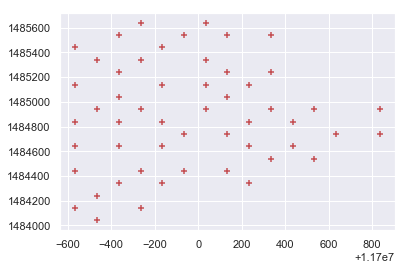

In [1454]:
plt.scatter(XX,YY, c='r', marker='+' );

In [ ]:
plt.scatter(X,Y, c='b', marker='.', label='grid', s=10)
plt.scatter(XX, YY, c='r', marker='s', label='selected', s=10)
plt.legend(loc='lower left')
plt.show()

### Graba el csv con los puntos generados

In [1456]:
index = []
for i in range(0,len(XX)):
    index.append(i)

data = {
    'x': XX,
    'y': YY
}
dfsel = pd.DataFrame(data=data, columns=['x','y'], index=index)

In [1457]:
filename_selected = '../data/sel_'+name+'.csv'
dfsel.to_csv(filename_selected)